In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
loan = pd.read_csv('kiva_loans.csv')

In [43]:
loan.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [6]:
loan.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [7]:
loan.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [8]:
# sns.pairplot(loan)

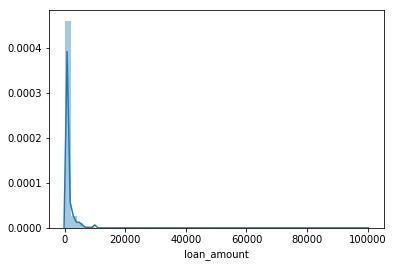

In [9]:
sns.distplot(loan['loan_amount'])

In [12]:
loan.corr()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,-0.049578,-0.027488,0.154787,-0.055832,-0.095418
funded_amount,-0.049578,1.000000,0.945044,-0.075276,0.149310,0.849168
loan_amount,-0.027488,0.945044,1.000000,-0.071251,0.184795,0.798697
partner_id,0.154787,-0.075276,-0.071251,1.000000,0.094878,-0.008575
term_in_months,-0.055832,0.149310,0.184795,0.094878,1.000000,0.227283
lender_count,-0.095418,0.849168,0.798697,-0.008575,0.227283,1.000000


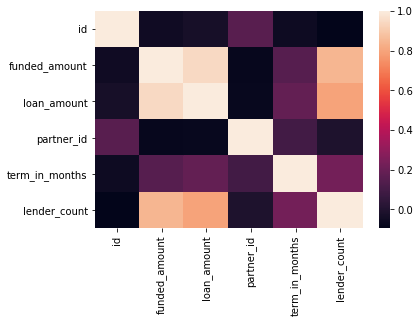

In [13]:
sns.heatmap(loan.corr())

# Output

Two output is interested: loan_amount and repayment_interval.  For the former, the loan_amount accounts directly associates with the risk; for the latter, it indicates the reliability of the loan.  

In [121]:
y = loan[['loan_amount','repayment_interval']]

In [122]:
y.head()

,loan_amount,repayment_interval
0,300.0,irregular
1,575.0,irregular
2,150.0,bullet
3,200.0,irregular
4,400.0,monthly


One-hot encoding for repayment_interval

In [123]:
choices = set(y['repayment_interval'])
print(choices)
y = y.loc[0:100, :]
y.tail()

{'monthly', 'irregular', 'bullet', 'weekly'}


,loan_amount,repayment_interval
96,325.0,irregular
97,2200.0,irregular
98,600.0,irregular
99,5000.0,monthly
100,1000.0,monthly


In [124]:
for each in choices:
    dummy = pd.DataFrame({
        each:[row['repayment_interval']==each for index, row in y.iterrows()]
    })
    y = y.join(dummy)    
y = y.drop('repayment_interval', axis=1)

In [125]:
y.tail()

,loan_amount,monthly,irregular,bullet,weekly
96,325.0,False,True,False,False
97,2200.0,False,True,False,False
98,600.0,False,True,False,False
99,5000.0,True,False,False,False
100,1000.0,True,False,False,False


Prepare the dataset

In [116]:
x = loan.loc[0:500,:]

In [117]:
x.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
496,653673,475.0,475.0,Dairy,Agriculture,to purchase another buffalo.,PK,Pakistan,Lahore,PKR,245.0,2014-01-03 11:20:41+00:00,2013-12-12 08:00:00+00:00,2014-01-04 13:56:00+00:00,14.0,18,NaN,female,monthly,2014-01-03
497,653525,400.0,400.0,Services,Services,"To buy sheltering materials such as bamboo, pl...",PK,Pakistan,Lahore,PKR,247.0,2014-01-03 06:16:14+00:00,2013-12-26 08:00:00+00:00,2014-01-06 16:50:54+00:00,12.0,16,NaN,female,irregular,2014-01-03
498,653763,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,81.0,2014-01-03 21:05:39+00:00,2013-12-17 08:00:00+00:00,2014-01-04 00:10:28+00:00,14.0,4,NaN,male,monthly,2014-01-03
499,653789,700.0,700.0,Retail,Retail,"to buy bread flour, sugar, eggs, food coloring...",SV,El Salvador,NaN,USD,81.0,2014-01-03 22:17:17+00:00,2013-12-13 08:00:00+00:00,2014-01-18 20:57:42+00:00,11.0,27,"#Parent, #Woman Owned Biz, user_favorite",female,monthly,2014-01-03
500,653583,500.0,500.0,Vehicle Repairs,Services,to buy four boxes of starters for vehicles.,KE,Kenya,Mariakani,KES,203.0,2014-01-03 08:24:04+00:00,2013-12-11 08:00:00+00:00,2014-01-21 15:02:30+00:00,11.0,18,"#Repeat Borrower, user_favorite",male,irregular,2014-01-03


In [118]:
choices = set(x['repayment_interval'])
print(choices)
for each in choices:
    dummy = pd.DataFrame({
        each:[row['repayment_interval']==each for index, row in x.iterrows()]
    })
    x = x.join(dummy)    
x = x.drop('repayment_interval', axis=1)

{'monthly', 'irregular', 'bullet'}


In [119]:
x.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,date,monthly,irregular,bullet
496,653673,475.0,475.0,Dairy,Agriculture,to purchase another buffalo.,PK,Pakistan,Lahore,PKR,...,2013-12-12 08:00:00+00:00,2014-01-04 13:56:00+00:00,14.0,18,NaN,female,2014-01-03,True,False,False
497,653525,400.0,400.0,Services,Services,"To buy sheltering materials such as bamboo, pl...",PK,Pakistan,Lahore,PKR,...,2013-12-26 08:00:00+00:00,2014-01-06 16:50:54+00:00,12.0,16,NaN,female,2014-01-03,False,True,False
498,653763,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,...,2013-12-17 08:00:00+00:00,2014-01-04 00:10:28+00:00,14.0,4,NaN,male,2014-01-03,True,False,False
499,653789,700.0,700.0,Retail,Retail,"to buy bread flour, sugar, eggs, food coloring...",SV,El Salvador,NaN,USD,...,2013-12-13 08:00:00+00:00,2014-01-18 20:57:42+00:00,11.0,27,"#Parent, #Woman Owned Biz, user_favorite",female,2014-01-03,True,False,False
500,653583,500.0,500.0,Vehicle Repairs,Services,to buy four boxes of starters for vehicles.,KE,Kenya,Mariakani,KES,...,2013-12-11 08:00:00+00:00,2014-01-21 15:02:30+00:00,11.0,18,"#Repeat Borrower, user_favorite",male,2014-01-03,False,True,False


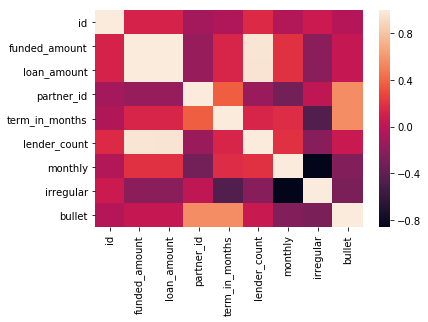

In [120]:
sns.heatmap(x.corr())

From the heat map, we can see that the `monthly` and `bullet` repayment interval is highly associated with `loan_amount` and `lender_count`

Explore the location dataset

In [127]:
location = pd.read_csv('kiva_mpi_region_locations.csv')
location.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [128]:
theme = pd.read_csv('loan_theme_ids.csv')
theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [129]:
theme_location = pd.read_csv('loan_themes_by_region.csv')
theme_location.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [130]:
theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
id                 779092 non-null int64
Loan Theme ID      764279 non-null object
Loan Theme Type    764279 non-null object
Partner ID         764279 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [131]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [132]:
theme_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
Partner ID            15736 non-null int64
Field Partner Name    15736 non-null object
sector                15736 non-null object
Loan Theme ID         15736 non-null object
Loan Theme Type       15736 non-null object
country               15736 non-null object
forkiva               15736 non-null object
region                15736 non-null object
geocode_old           1200 non-null object
ISO                   15722 non-null object
number                15736 non-null int64
amount                15736 non-null int64
LocationName          15736 non-null object
geocode               13662 non-null object
names                 13661 non-null object
geo                   15736 non-null object
lat                   13662 non-null float64
lon                   13662 non-null float64
mpi_region            15722 non-null object
mpi_geo               9671 non-null object
rural_pct     